In [1]:
# Bibliotecas para Exibir, Analisar, Explorar dados
import pandas as pd
import numpy as np

# Opções gerais da biblioteca pandas
pd.set_option('display.max_rows', 700)
pd.set_option('display.max_columns', 70)
# Colunas dos textos da biblioteca pandas
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

# Biblioteca para exibir gráficos
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Obter dataset
dflis = pd.read_csv(filepath_or_buffer="listings-RIo_de_Janeiro.csv", encoding="UTF-8", sep=',', usecols=None)    # fim linha #

#### COPIAR DATASET
Copiar o dataset importado para preservar o dataset original que pode ser utilizado em determinadas análises paralelas

In [3]:
# Copiar o dataset importado para preservar o dataset original
dflis0 = dflis.copy()

#### ANALISAR DATASET
Conhecer tipos de dados reconhecidos pela biblioteca pandas e assim:<br>
- identificar missing values<br>
- identificar necessidade de conversão de tipos de dados<br>
- identificar necessidade ajustar conteúdo dos dados<br>
- detectar colunas desnecessárias a criação do modelo<br>

In [4]:
# Analisar nomes de colunas. Antes foi aplicado a conversão para tipo lista, para melhor visibilidade
columns_nomes = list(dflis0.columns)
columns_qtde = len(columns_nomes)
print(f'O algoritmo pandas importou {columns_qtde} sendo : {columns_nomes}')

O algoritmo pandas importou 16 sendo : ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [5]:
# Exibir e Analisar quatro registros
dflis0.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,191,7,251,2020-04-06,2.08,1,287
1,21280,Renovated Modern Apt. Near Beach,81163,Jules,NaN,Ipanema,-22.98467,-43.19611,Entire home/apt,424,5,94,2020-03-22,1.22,1,93
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,159,7,238,2020-02-15,1.95,3,154
3,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,344,2,282,2020-03-02,2.33,1,0


In [6]:
# Exibir e Analisar tipos de dados, colunas com possíveis missing values, memória utilizada pelo dataset
dflis0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35731 entries, 0 to 35730
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              35731 non-null  int64  
 1   name                            35673 non-null  object 
 2   host_id                         35731 non-null  int64  
 3   host_name                       35726 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   35731 non-null  object 
 6   latitude                        35731 non-null  float64
 7   longitude                       35731 non-null  float64
 8   room_type                       35731 non-null  object 
 9   price                           35731 non-null  int64  
 10  minimum_nights                  35731 non-null  int64  
 11  number_of_reviews               35731 non-null  int64  
 12  last_review                     

In [7]:
# Imprimir-Analisar-Identificarcolunas/variáveis com dados não únicos
for col_ds in dflis0:
    col_dupl = dflis0[col_ds].nunique() != len(dflis0)
    if col_dupl:
        print(f'A coluna "{col_ds}" possui dados não únicos/não duplicados.')

A coluna "name" possui dados não únicos/não duplicados.
A coluna "host_id" possui dados não únicos/não duplicados.
A coluna "host_name" possui dados não únicos/não duplicados.
A coluna "neighbourhood_group" possui dados não únicos/não duplicados.
A coluna "neighbourhood" possui dados não únicos/não duplicados.
A coluna "latitude" possui dados não únicos/não duplicados.
A coluna "longitude" possui dados não únicos/não duplicados.
A coluna "room_type" possui dados não únicos/não duplicados.
A coluna "price" possui dados não únicos/não duplicados.
A coluna "minimum_nights" possui dados não únicos/não duplicados.
A coluna "number_of_reviews" possui dados não únicos/não duplicados.
A coluna "last_review" possui dados não únicos/não duplicados.
A coluna "reviews_per_month" possui dados não únicos/não duplicados.
A coluna "calculated_host_listings_count" possui dados não únicos/não duplicados.
A coluna "availability_365" possui dados não únicos/não duplicados.


>Após aplicar a rotina anterior sabermos que o campo id não se repete, então provavelmente há 35731 mil registros à analisar. Os campos/colunas name, host_name, neighbourhood_group, last_review, reviews_per_month possuem menos de 35731 registros e isto obriga a analisar cada coluna para entender sobre colunas desnecessárias, tipos de dados a converter, dados a substituir, dados faltantes a serem gerados, exclusão de registros, exclusão de colunas, etc

In [8]:
# Identificar e Analisar missing values em todas as colunas/variáveis
dflis0.isnull().sum()

id                                    0
name                                 58
host_id                               0
host_name                             5
neighbourhood_group               35731
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       14991
reviews_per_month                 14991
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### LIMPEZA E TRATAMENTO DE DADOS
##### Assim será possível analisar melhor os dados ao longo de um tempo
>:Excluir colunas/variáveis desnecessárias<br>
>:Excluir dados com data Null ou NaN<br>
>:Converter tipo de dados, interpretados erronemente pelo algorítmo pandas<br>
>:Substituir dados Nulls ou NaNs<br>
>:O novo datafame terá somente registros cujos campos last_review, reviews_per_month estejam preenchidos, sem dados Null/NaNs/Vazios<br>
>:Os dados serão analisados longo do tempo utilizando a variável `last_review`. Permitirá trabalhar melhor com o dataset como Time Series

In [9]:
# Modificar-Apagar colunas/variáveis
column_drop = ['name','host_name','neighbourhood_group']
dflis0 = dflis0.drop(columns=column_drop)

##### `**Modificar-Atualizar DataSet**`

In [10]:
# Modificar-Apagar registros/linhas que possuam valor Null ou NaN
# Substituirá o dataframe com valores sem Null ou NaN
dflis0 = pd.DataFrame(dflis0.dropna())

In [11]:
# Modificar-Criar nova feature para armazenar mes extraido de uma data completa
dflis0['last_review_month'] = pd.DatetimeIndex(dflis0['last_review']).month

In [12]:
# Modificar-Criar nova feature para armazenar ano extraido de uma data completa
dflis0['last_review_year'] = pd.DatetimeIndex(dflis0['last_review']).year

In [13]:
# Modificar-Criar nova feature-Converter coluna object em float para melhor trabalhar com os numeros
dflis0['reviews_per_month'] = pd.to_numeric(dflis0['reviews_per_month'], errors='coerce')

In [14]:
# Modificar-Criar nova feature-Converter campo int para float, por ser um campo de preço do produto
dflis0['price'] = dflis0['price'].astype(float)

##### `**Modificar-Atualizar DataSet**`

In [15]:
# Modificar-Criar novo dataframe com periodo do ano de 2017 a 2019
dflis0 = dflis0.query('last_review >= "2017-01-01" and last_review <= "2019-12-31"').copy()

In [16]:
# Analisar data inicial e final no dataset
data_ini = dflis0['last_review'].min()
data_fin = dflis0['last_review'].max()
data_ini, data_fin

('2017-01-01', '2019-12-31')

In [17]:
# Biblioteca para atribuir um valor inteiro/float a um valor categorico
# Neste caso foi necessário para gerar o mapa de correlação que trabalha com valores numéricos
from sklearn.preprocessing import OrdinalEncoder

In [18]:
dflis0['neighbourhood1'] = dflis0['neighbourhood']

In [19]:
encoder = OrdinalEncoder()

In [20]:
dflis0['neighbourhood1'] = encoder.fit_transform(dflis0[['neighbourhood1']])

In [21]:
# Identificar e Analisar missing values em todas as colunas/variáveis
dflis0.isnull().sum()

id                                0
host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
last_review_month                 0
last_review_year                  0
neighbourhood1                    0
dtype: int64

In [22]:
# Exibir e Analisar tipos de dados, colunas com possíveis missing values, memória utilizada pelo dataset
dflis0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6239 entries, 7 to 31939
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6239 non-null   int64  
 1   host_id                         6239 non-null   int64  
 2   neighbourhood                   6239 non-null   object 
 3   latitude                        6239 non-null   float64
 4   longitude                       6239 non-null   float64
 5   room_type                       6239 non-null   object 
 6   price                           6239 non-null   float64
 7   minimum_nights                  6239 non-null   int64  
 8   number_of_reviews               6239 non-null   int64  
 9   last_review                     6239 non-null   object 
 10  reviews_per_month               6239 non-null   float64
 11  calculated_host_listings_count  6239 non-null   int64  
 12  availability_365                6

## <center>EXPLICAÇÃO DO CONTEÚDO DO DATASET EM ESTUDO</center>
>Para facilitar entendimento da análise dos dados, considerei somente os registros cuja variável `last_review` esteja preenchida. Desta forma tratarei o dataset como do tipo Time Series, analisando as informações ao longo do tempo.<br>
Selecionei somente os anos 2017 a 2019 por que considero suficiente para entender a variabilidade dos/nos dados

#### ANALISE DESCRITIVA
>Informações de médias, mediana, desvio padrão, calculo de variância

##### Qual a Estatística Descritiva de todas as variáveis ?

In [23]:
# Resumo Estatística Descritiva de todas as variáveis numéricas no período de 2017-01-01 a 2019-12-31
# Quantidade de dados, média, desvio padrão, valor minimo, 1o quartil, 2o quartil, 3o quartil, valor máximo
dflis0[['price','minimum_nights','number_of_reviews','reviews_per_month',
        'calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6239.000000,6239.000000,6239.000000,6239.000000,6239.000000,6239.000000
mean,459.027569,4.664369,6.617407,0.192351,5.665972,168.277448
std,1346.994327,26.779080,12.706781,0.253995,17.438758,155.465329
min,0.000000,1.000000,1.000000,0.020000,1.000000,0.000000
25%,138.000000,1.000000,1.000000,0.060000,1.000000,0.000000
50%,238.000000,2.000000,3.000000,0.120000,1.000000,152.000000
75%,418.000000,3.000000,6.000000,0.220000,3.000000,362.000000
max,35498.000000,1000.000000,301.000000,3.780000,200.000000,365.000000


##### Qual a Estatística Descritiva do preço por ano ?

In [24]:
# Estatística Descritiva do preço separada por periodo de 2017-01-01 a 2019-12-31
price2017 = dflis0.query('last_review >= "2017-01-01" and last_review <= "2017-12-31"')['price'].describe()  # fim linha #
price2018 = dflis0.query('last_review >= "2018-01-01" and last_review <= "2018-12-31"')['price'].describe()  # fim linha #
price2019 = dflis0.query('last_review >= "2019-01-01" and last_review <= "2019-12-31"')['price'].describe()  # fim linha #
pricedescribe = pd.DataFrame({'2017': price2017, '2018': price2018, '2019': price2019})
pricedescribe.rename_axis('Estatística Descritiva do Preço', axis=1)

Estatística Descritiva do Preço,2017,2018,2019
count,892.000000,1202.000000,4145.000000
mean,526.272422,480.366057,438.368637
std,1709.563526,1291.594288,1271.937586
min,32.000000,0.000000,0.000000
25%,139.000000,135.000000,139.000000
50%,249.000000,230.000000,241.000000
75%,450.000000,439.000000,407.000000
max,31402.000000,19989.000000,35498.000000


In [25]:
# Frequência de listings e percentual por ano
id_qtde = dflis0.groupby(['last_review_year'])['id'].count()
id_perc = dflis0.groupby(['last_review_year'])['id'].count()/len(dflis0)*100
id_freq = pd.DataFrame({'Frequência': id_qtde, 'Percentual (%)': id_perc})
id_freq.rename_axis('Ano Referência', axis=1).head()

Ano Referência,Frequência,Percentual (%)
last_review_year,,
2017,892,14.297163
2018,1202,19.265908
2019,4145,66.436929


>**ANALISE**<br>
>Houve mais négocios realizados de um ano para o outro, e deve ter havido diversas promoções, pacotes deixando o valor mais baixo e isto explica o motivo da média estar bem próxima.

In [26]:
# Listings sem valor
dflis0.query('price <= 0')

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_month,last_review_year,neighbourhood1
19145,20269038,100693784,Jacarepaguá,-22.97320,-43.41019,Entire home/apt,0.0,3,4,2019-05-12,0.20,4,362,5,2019,44.0
19614,21144730,107465765,Copacabana,-22.96854,-43.18862,Hotel room,0.0,3,1,2018-09-11,0.05,4,364,9,2018,19.0
19634,21180262,3477417,Copacabana,-22.96951,-43.18890,Private room,0.0,2,1,2019-10-17,0.12,4,364,10,2019,19.0


>**ANALISE**<br>
>Não é possível saber o motivo de três hostels estarem com valor zero, mas provavelmente o motivo pode ser a não locação. Não é possível saber o motivo da não locação.

##### Qual a Estatística Descritiva do preço por neighbourhood por ano ?

In [27]:
# Estatística Descritiva do preço por neighbourhood por ano : quantidade, média, desvio padrão, valor mínimo, 1o quartil,
# 2o quartil, 3o quartil, valor máximo
dflis0.query('last_review >= "2017-01-01" and last_review <= "2019-12-31"').groupby(['neighbourhood','room_type','last_review_year'])['price'].describe().head(440)  # fim linha #

count          mean           std     min      25%      50%       75%      max
neighbourhood            room_type       last_review_year                                                                                
Alto da Boa Vista        Entire home/apt 2017                1.0   1895.000000           NaN  1895.0  1895.00   1895.0   1895.00   1895.0
                                         2019                6.0   3097.000000   3520.455482   321.0   669.50   1464.5   4901.00   8881.0
                         Private room    2019                2.0    185.000000     94.752309   118.0   151.50    185.0    218.50    252.0
Andaraí                  Entire home/apt 2017                2.0    108.500000     33.234019    85.0    96.75    108.5    120.25    132.0
                                         2019                1.0    600.000000           NaN   600.0   600.00    600.0    600.00    600.0
                         Private room    2017                2.0     64.000000     22.627417    48.0    56.00     64.0     72.00     80.0
                                         2018                2.0     91.000000     15.556349    80.0    85.50     91.0     96.50    102.0
                                         2019                1.0     53.000000           NaN    53.0    53.00     53.0     53.00     53.0
Anil                     Entire home/apt 2019                1.0    300.000000           NaN   300.0   300.00    300.0    300.00    300.0
                         Private room    2019                4.0    141.750000     48.376130   112.0   116.50    120.5    145.75    214.0
Barra da Tijuca          Entire home/apt 2017               74.0    839.810811   1067.638075   107.0   249.00    430.5    887.25   5086.0
                                         2018               85.0    579.388235    506.995893    69.0   230.00    381.0    799.00   2647.0
                                         2019              315.0    635.180952   1539.861718    59.0   252.00    348.0    668.00  25000.0
                         Hotel room      2019                3.0   1792.666667   2775.911622   182.0   190.00    198.0   2598.00   4998.0
                         Private room    2017               33.0    355.666667    493.647816    54.0   161.00    198.0    302.00   2382.0
                                         2018               28.0    254.357143    218.498956    59.0   119.50    179.5    256.00    889.0
                                         2019              137.0    241.445255    168.741009    69.0   128.00    198.0    300.00   1065.0
                         Shared room     2017                6.0    144.500000    118.250159    75.0    75.00     83.0    157.75    371.0
                                         2018                3.0    214.000000    245.969510    69.0    72.00     75.0    286.50    498.0
                                         2019               11.0    343.272727    626.922338    70.0    91.00    118.0    203.50   2195.0
Barra de Guaratiba       Entire home/apt 2017                2.0    463.000000    147.078210   359.0   411.00    463.0    515.00    567.0
                                         2018                2.0    465.500000    400.929545   182.0   323.75    465.5    607.25    749.0
                                         2019                3.0    271.666667    123.488191   155.0   207.00    259.0    330.00    401.0
                         Private room    2017                1.0    198.000000           NaN   198.0   198.00    198.0    198.00    198.0
                                         2018                5.0    214.200000     58.096471   150.0   182.00    198.0    241.00    300.0
                                         2019                1.0    300.000000           NaN   300.0   300.00    300.0    300.00    300.0
Bonsucesso               Entire home/apt 2019                4.0     88.250000     42.648759    53.0    65.75     75.0     97.50    150.0
                         Private room    2019            

>**ANALISE**<br>
>Possível perceber que a diferenca de preços esta relacionado ao local e tipo do quarto (room_type) do que pelo local (neighbourhood).<br>
>O tipo do quarto Entire home/apt é o mais caro entre os tipos de quarto.<br>
>O Entire home/apt na Vila Isabel os preços foram consideravelmente reduzidos de 599.50 para 249.00 no último ano. Provavelmente sofreu maior redução por conta do público alvo.<br>
>Os quartos diferentes do Entire home/apt possuem uma grande variação de preços de 2017 para 2019 tanto para baixo quanto para cima<br>

In [28]:
# Estatística Descritiva Coeficiente de Variância somente do preço por neighbourhood por ano
dflis0.query('last_review >= "2017-01-01" and last_review <= "2019-12-31"').groupby(['neighbourhood','last_review_year'])[['price']].var()   # fim da linha #

price
neighbourhood            last_review_year              
Alto da Boa Vista        2017                       NaN
                         2019              1.067095e+07
Andaraí                  2017              1.198917e+03
                         2018              2.420000e+02
                         2019              1.496045e+05
Anil                     2019              6.763800e+03
Barra da Tijuca          2017              8.760735e+05
                         2018              2.214262e+05
                         2019              1.694139e+06
Barra de Guaratiba       2017              3.422433e+04
                         2018              4.407700e+04
                         2019              1.036692e+04
Bonsucesso               2019              1.637367e+03
Botafogo                 2017              2.750326e+04
                         2018              7.563009e+04
                         2019              3.816527e+04
Brás de Pina             2017                       NaN
                         2018              5.275000e+03
                         2019              1.538250e+03
Cachambi                 2017                       NaN
                         2018                       NaN
                         2019              2.464200e+04
Cacuia                   2018              3.333333e-01
                         2019                       NaN
Camorim                  2017              2.064830e+04
                         2018              4.901363e+05
                         2019              5.770539e+04
Campinho                 2019              6.251294e+08
Campo Grande             2018              3.532333e+03
                         2019              1.282190e+04
Catete                   2017              3.154982e+03
                         2018              4.146226e+04
                         2019              9.781358e+03
Centro                   2017              4.094662e+04
                         2018              1.307942e+04
                         2019              1.309257e+04
Cidade Nova              2017                       NaN
                         2019              1.125000e+04
Cidade Universitária     2018                       NaN
Cidade de Deus           2018                       NaN
                         2019              5.423333e+02
Complexo do Alemão       2017                       NaN
                         2018              1.445000e+02
Copacabana               2017              5.697296e+06
                         2018              4.332617e+06
                         2019              1.012516e+06
Cosme Velho              2017              4.532100e+04
                         2018              2.736814e+04
                         2019              3.256642e+07
Cosmos                   2018                       NaN
                         2019                       NaN
Curicica                 2017                       NaN
                         2018              7.220000e+02
                         2019              6.080766e+03
Del Castilho             2018              3.698000e+03
                         2019              6.285070e+04
Engenho Novo             2018              3.528000e+03
                         2019              2.437333e+03
Engenho da Rainha        2019                       NaN
Engenho de Dentro        2017                       NaN
                         2019              2.864425e+04
Estácio                  2017                       NaN
                         2018              3.612500e+03
                         2019              6.774801e+03
Flamengo                 2017              2.980204e+04
                         2018              2.982090e+04
                         2019              5.945255e+04
Freguesia (Jacarepaguá)  2017              1.891000e+03
                         2018              1.388017e+04
                         2019              4.137623e+04
Gamboa            

##### Qual a Frequência e Percentual de Frequência da neighbourhood por ano ?

In [29]:
# Frequência e Percentual de neighbourhood por ano entre 2017
neighb_unique = len(dflis0['neighbourhood'].unique())
neighb_qtde = dflis0.query('last_review >= "2017-01-01" and last_review <= "2017-12-31"')['neighbourhood'].value_counts()  # fim da linha #
neighb_perc = dflis0.query('last_review >= "2017-01-01" and last_review <= "2017-12-31"')['neighbourhood'].value_counts(normalize=True)  # fim da linha #
distr_neighb = pd.DataFrame({'Frequência': neighb_qtde, 'Percentual (%)': neighb_perc})
distr_neighb.rename_axis('Neighbourhood - 2017', axis=1).head(neighb_unique)

Neighbourhood - 2017,Frequência,Percentual (%)
Copacabana,233,0.261211
Barra da Tijuca,113,0.126682
Ipanema,62,0.069507
Jacarepaguá,60,0.067265
Botafogo,50,0.056054
Leblon,48,0.053812
Recreio dos Bandeirantes,32,0.035874
Santa Teresa,30,0.033632
Centro,28,0.031390
Flamengo,27,0.030269


In [30]:
# Frequência e Percentual de neighbourhood por ano entre 2018
neighb_unique = len(dflis0['neighbourhood'].unique())
neighb_qtde = dflis0.query('last_review >= "2018-01-01" and last_review <= "2018-12-31"')['neighbourhood'].value_counts()  # fim da linha #
neighb_perc = dflis0.query('last_review >= "2018-01-01" and last_review <= "2018-12-31"')['neighbourhood'].value_counts(normalize=True)  # fim da linha #
distr_neighb = pd.DataFrame({'Frequência': neighb_qtde, 'Percentual (%)': neighb_perc})
distr_neighb.rename_axis('Neighbourhood - 2018', axis=1).head(neighb_unique)

Neighbourhood - 2018,Frequência,Percentual (%)
Copacabana,338,0.281198
Barra da Tijuca,116,0.096506
Ipanema,100,0.083195
Botafogo,75,0.062396
Leblon,56,0.046589
Santa Teresa,55,0.045757
Flamengo,48,0.039933
Jacarepaguá,41,0.034110
Recreio dos Bandeirantes,37,0.030782
Laranjeiras,30,0.024958


In [31]:
# Frequência e Percentual de neighbourhood por ano em 2019
neighb_unique = len(dflis0['neighbourhood'].unique())
neighb_qtde = dflis0.query('last_review >= "2019-01-01" and last_review <= "2019-12-31"')['neighbourhood'].value_counts()  # fim da linha #
neighb_perc = dflis0.query('last_review >= "2019-01-01" and last_review <= "2019-12-31"')['neighbourhood'].value_counts(normalize=True)  # fim da linha #
distr_neighb = pd.DataFrame({'Frequência': neighb_qtde, 'Percentual (%)': neighb_perc})
distr_neighb.rename_axis('Neighbourhood - 2019', axis=1).head(neighb_unique)

Neighbourhood - 2019,Frequência,Percentual (%)
Copacabana,1097,0.264656
Barra da Tijuca,466,0.112425
Ipanema,368,0.088782
Jacarepaguá,357,0.086128
Leblon,217,0.052352
Botafogo,193,0.046562
Recreio dos Bandeirantes,182,0.043908
Santa Teresa,141,0.034017
Flamengo,118,0.028468
Centro,115,0.027744


##### Qual a Estatística Descritiva do preço por room_type por ano ?

In [32]:
# Estatística Descritiva do preço por room_type por ano : quantidade, média, desvio padrão, valor mínimo, 1o quartil,
# 2o quartil, 3o quartil, valor máximo
dflis0.query('last_review >= "2017-01-01" and last_review <= "2019-12-31"').groupby(['room_type','last_review_year'])['price'].describe()  # fim linha #

count        mean          std   min    25%    50%     75%      max
room_type       last_review_year                                                                      
Entire home/apt 2017               598.0  658.570234  1986.776202  59.0  196.0  302.0  498.00  31402.0
                2018               823.0  598.597813  1491.038080  37.0  182.0  300.0  537.50  19989.0
                2019              2680.0  560.842910  1478.204331   0.0  196.0  302.0  509.00  35498.0
Hotel room      2017                 1.0   43.000000          NaN  43.0   43.0   43.0   43.00     43.0
                2018                 8.0   84.625000    68.924260   0.0   42.0   53.0  140.50    201.0
                2019                32.0  353.406250   870.886306  42.0   54.0  120.5  300.50   4998.0
Private room    2017               268.0  268.238806   897.227049  32.0   85.0  142.0  221.75  13998.0
                2018               351.0  231.917379   628.800110  37.0   88.0  138.0  231.50  10000.0
                2019              1312.0  198.265244   264.270947   0.0   94.0  148.0  225.00   6403.0
Shared room     2017                25.0  147.160000   135.518658  32.0   58.0   91.0  180.00    600.0
                2018                20.0  133.700000   207.061928  32.0   48.0   69.5   89.75    899.0
                2019               121.0  351.619835  2270.037214  37.0   64.0   91.0  150.00  25000.0

>**ANALISE**<br>
>O preço médio total por quarto apresenta as diferenças de valores entre os tipos.<br>
>É possível identificar a redução dos preços a cada ano.<br>

##### Qual a Estatística Descritiva do preço por number_of_reviews por ano ?

In [33]:
# Estatística Descritiva do preço por room_type por ano : quantidade, média, desvio padrão, valor mínimo, 1o quartil,
# 2o quartil, 3o quartil, valor máximo
dflis0.query('last_review >= "2017-01-01" and last_review <= "2019-12-31"').groupby(['number_of_reviews','last_review_year'])['price'].describe()  # fim linha #

count          mean          std      min       25%      50%       75%      max
number_of_reviews last_review_year                                                                                  
1                 2017               285.0    584.101754  1783.136912     32.0    148.00    249.0    492.00  25000.0
                  2018               407.0    455.395577   771.986369      0.0    139.00    249.0    460.50   7857.0
                  2019              1217.0    518.151191  1766.828812      0.0    148.00    252.0    498.00  35498.0
2                 2017               160.0    494.087500   998.930191     32.0    148.00    270.0    450.00  10636.0
                  2018               212.0    682.924528  2155.747797     37.0    148.00    249.0    459.00  19817.0
                  2019               694.0    467.609510  1210.272764     42.0    148.00    249.0    429.00  20002.0
3                 2017               116.0    612.370690  2902.004221     37.0    148.00    249.0    401.25  31402.0
                  2018               114.0    469.622807  1026.118491     42.0    155.00    229.0    401.00  10000.0
                  2019               454.0    391.215859   707.884693     37.0    138.25    250.5    428.75  12325.0
4                 2017                76.0    342.407895   518.579860     48.0    121.00    199.5    397.00   3971.0
                  2018               101.0    411.326733   781.315904     42.0    148.00    296.0    498.00   7677.0
                  2019               322.0    401.223602   871.551812      0.0    140.00    238.0    401.00  11135.0
5                 2017                46.0    359.043478   313.081598     43.0    153.25    250.5    476.50   1499.0
                  2018                57.0    326.438596   316.947834     70.0    148.00    196.0    355.00   1483.0
                  2019               191.0    439.931937   679.233601     43.0    128.00    249.0    450.00   6499.0
6                 2017                30.0    999.100000  3563.847014     58.0    145.75    301.0    485.75  19817.0
                  2018                41.0    812.048780  3084.876059     37.0    111.00    252.0    498.00  19989.0
                  2019               176.0    396.613636   634.945297     37.0    148.00    249.0    419.50   7334.0
7                 2017                27.0    594.962963   869.523941     79.0    175.50    252.0    375.50   3319.0
                  2018                33.0    489.818182   664.562283     58.0    148.00    249.0    498.00   3330.0
                  2019               136.0    465.323529  1495.239973     42.0    132.00    250.5    394.25  16794.0
8                 2017                22.0    271.772727   330.917474     59.0     93.75    154.5    348.75   1588.0
                  2018                35.0    341.257143   309.560917     42.0    106.50    228.0    434.50   1001.0
                  2019               115.0    299.626087   278.549043     37.0    132.00    187.0    402.00   2002.0
9                 2017                12.0    685.000000  1085.224401    106.0    173.50    301.5    660.75   4015.0
                  2018                28.0    264.321429   182.117799     90.0    142.75    232.5    295.50    799.0
                  2019                89.0    383.505618   518.471204     48.0    148.00    252.0    424.00   3489.0
10                2017                10.0    633.100000  1052.249912     69.0    136.00    191.5    578.25   3501.0
                  2018                16.0    224.187500   149.763021     64.0    126.50    148.0    297.25    514.0
                  2019                72.0    333.583333   536.005827     42.0    144.00    230.5    348.25   4502.0
11                2017                 8.0    112.750000    66.463201     42.0     72.75     80.0    150.50    219.0
                  2018                17.0    902.588235  2818.606151     58.0    111.00    222.0    307.00  11827.0
                  2019                58.0    262.189655   

>**ANALISE**<br>
>A quantidade reviews pode ter contribuido para o aumento dos listings, e pouco para o aumento do preço das locações, no geral.

In [34]:
# Analisar o motivo de 301 reviews e somente 1 listing
dflis0.query('number_of_reviews == 301')

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_month,last_review_year,neighbourhood1
154,273753,556738,Santa Teresa,-22.91676,-43.1807,Private room,48.0,90,301,2019-10-02,3.78,4,365,10,2019,79.0


>**ANALISE**<br>
>Um listing com 301 reviews foi locado apenas uma vez em 2019. Pode ter sido por ter uma quantidade minima de 48 noites a comprar, pouco tempo de anúncio, talvez o local no Rio de Janeiro ou pode ser duas das três opções ou todas as opções

##### Qual o preço médio de review por mês ?

In [35]:
reviews_month_price_mean = dflis0.groupby(['last_review_month'])['price'].mean()

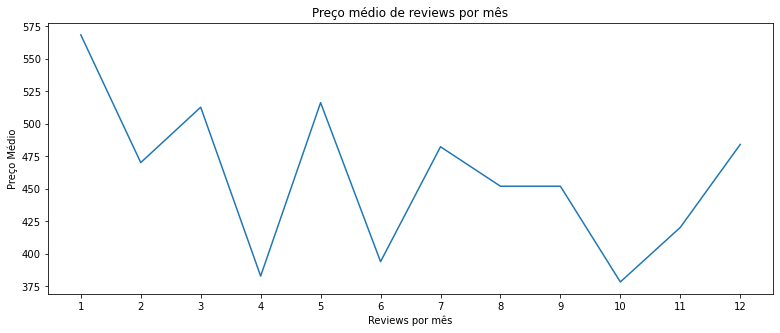

In [36]:
plt.figure(figsize=(13, 5))
plt.plot(reviews_month_price_mean)
plt.xticks(np.arange(1, 13, step=1))
plt.ylabel('Preço Médio')
plt.xlabel('Reviews por mês')
plt.title('Preço médio de reviews por mês')
plt.show()

>**ANALISE**<br>
>O preço médio mensal é bastante irregular. O preço mais alto parece estar relacionada as férias de junho e final de ano.

##### Qual o preço médio de review por ano ?

In [37]:
reviews_year_price_mean = dflis0.groupby(['last_review_year'])['price'].mean()

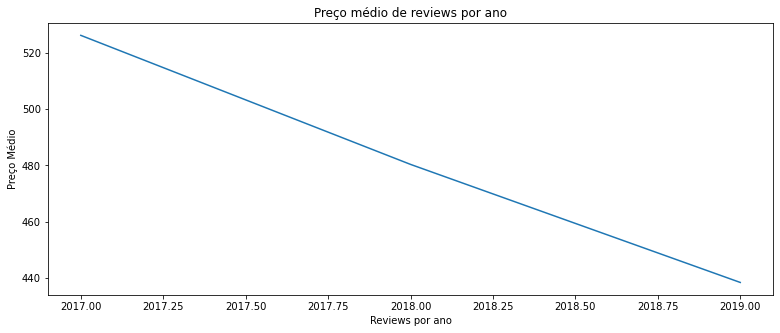

In [38]:
plt.figure(figsize=(13, 5))
plt.plot(reviews_year_price_mean.index, reviews_year_price_mean)
plt.ylabel('Preço Médio')
plt.xlabel('Reviews por ano')
plt.title('Preço médio de reviews por ano')
plt.show()

In [39]:
reviews_year_price_mean

last_review_year
2017    526.272422
2018    480.366057
2019    438.368637
Name: price, dtype: float64

>**ANALISE**<br>
>O preço médio caiu do ano 2017 ao 2019. Houve uma desvalorização nos preços.

##### Qual o preço por mês por neighbourhood ?

In [40]:
# Modificar-Analisar-Obter lista de neighbourhood não duplicados
neighbourdhoods = dflis0['neighbourhood'].unique()

In [41]:
# Modificar-Analisar-Preco por mes por neighboourhood
price_by_month_neighborhood = dflis0.groupby(['last_review_month','neighbourhood']).mean().reset_index()

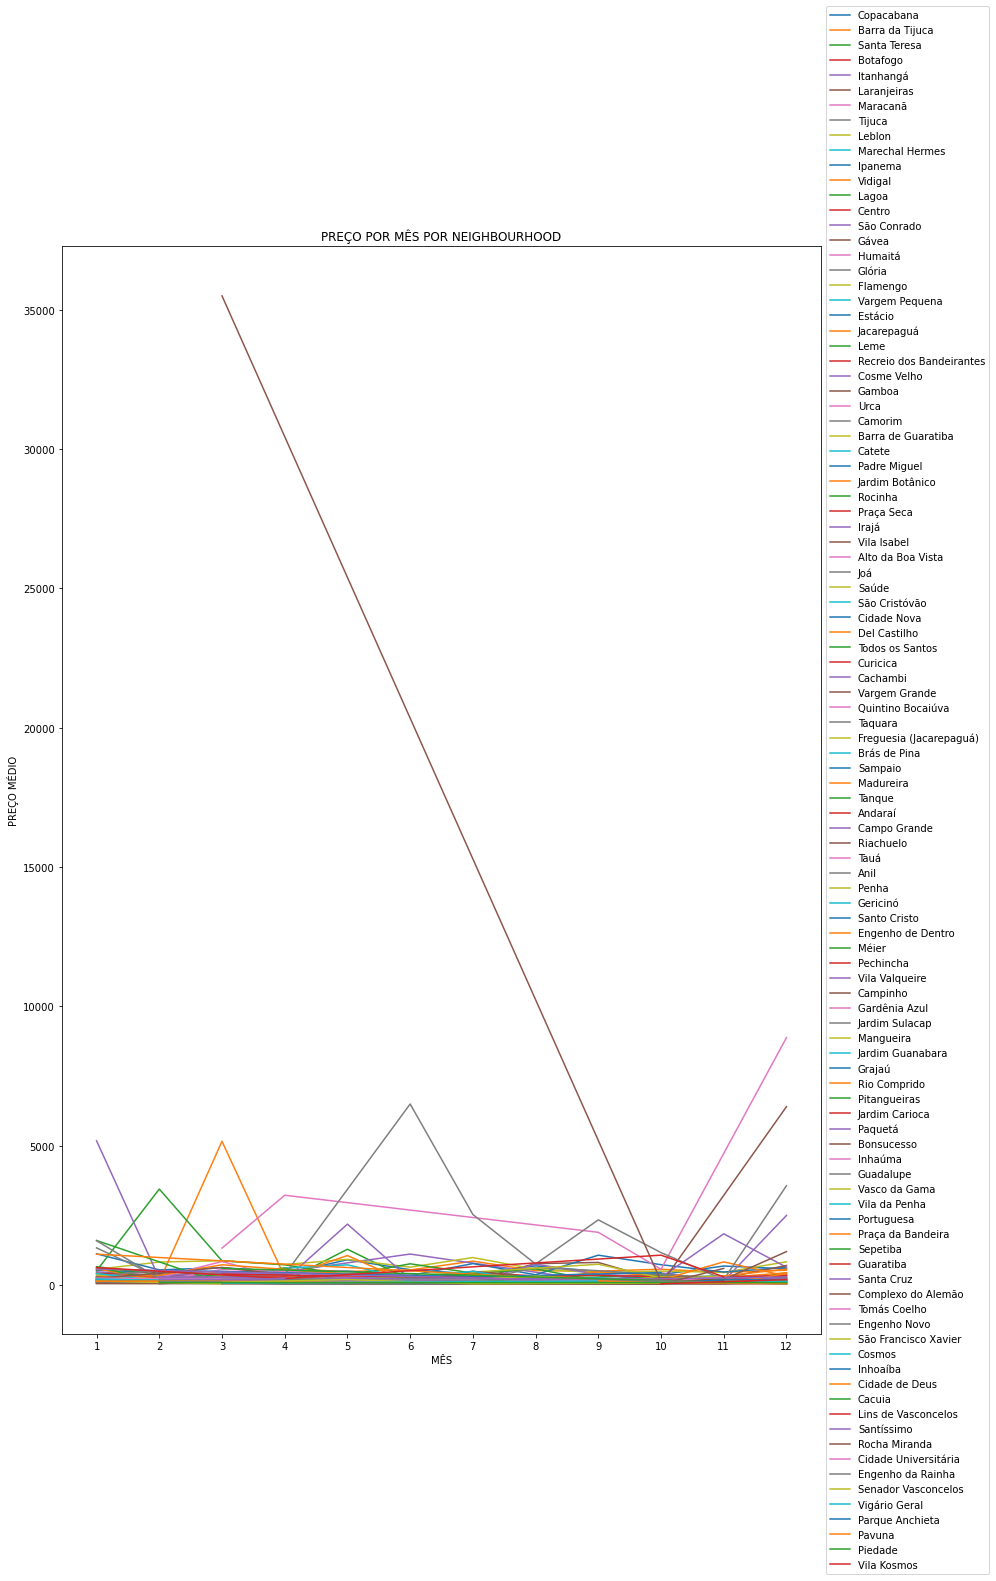

In [42]:
# Plot preço para cada neighborhood
fig = plt.figure(figsize=(17, 20))
ax = plt.subplot(111)
for neighbourhoo in  neighbourdhoods:
    ax.plot(price_by_month_neighborhood[price_by_month_neighborhood['neighbourhood'] == neighbourhoo]['last_review_month'],
            price_by_month_neighborhood[price_by_month_neighborhood['neighbourhood'] == neighbourhoo]['price'],
            label  = neighbourhoo
           )
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylabel('PREÇO MÉDIO')
plt.xlabel('MÊS')
plt.xticks(np.arange(1, 13, step=1))
plt.title('PREÇO POR MÊS POR NEIGHBOURHOOD')
#plt.savefig('./preco_mes_neighbourhood.png')
plt.show()

In [43]:
# Modificar-Analisar-Obter lista de neighbourhood não duplicados
neighbourdhoods = dflis0['room_type'].unique()
neighbourdhoods

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [44]:
# Modificar-Analisar-Preco por mes por neighboourhood
price_by_month_neighborhood = dflis0.groupby(['last_review_month','room_type']).mean().reset_index()
price_by_month_neighborhood

,last_review_month,room_type,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,neighbourhood1
0,1,Entire home/apt,1.615751e+07,6.333198e+07,-22.970301,-43.236726,686.577586,8.679310,4.393103,0.108017,5.582759,133.803448,2018.403448,30.294828
1,1,Hotel room,2.003519e+07,1.407669e+08,-22.981007,-43.371943,177.000000,3.333333,4.000000,0.106667,8.333333,16.666667,2018.333333,30.333333
2,1,Private room,1.707392e+07,6.278347e+07,-22.961690,-43.224055,277.215962,5.342723,3.732394,0.097465,2.868545,167.093897,2018.422535,35.267606
3,1,Shared room,1.797088e+07,8.266659e+07,-22.937541,-43.228983,201.066667,4.333333,3.666667,0.100667,4.066667,224.133333,2018.733333,40.133333
4,2,Entire home/apt,1.482234e+07,5.684572e+07,-22.965584,-43.216604,545.068182,5.176768,5.335859,0.116111,3.843434,125.000000,2018.083333,30.853535
5,2,Hotel room,7.627438e+06,3.928994e+07,-22.968410,-43.186270,58.000000,1.000000,18.000000,0.300000,2.000000,0.000000,2019.000000,19.000000
6,2,Private room,1.667387e+07,6.719548e+07,-22.955197,-43.214528,297.293750,2.606250,4.168750,0.103187,2.993750,118.262500,2017.993750,38.175000
7,2,Shared room,1.778403e+07,9.696536e+07,-22.951190,-43.279204,138.400000,2.400000,3.800000,0.088000,1.600000,217.800000,2017.600000,33.800000
8,3,Entire home/apt,1.621657e+07,6.008541e+07,-22.964335,-43.217385,608.884927,6.110211,6.915721,0.158574,5.136143,149.863857,2018.554295,34.103728
9,3,Hotel room,1.387718e+07,4.326936e+07,-22.968340,-43.187530,42.000000,1.000000,6.000000,0.230000,3.000000,64.000000,2019.000000,19.000000


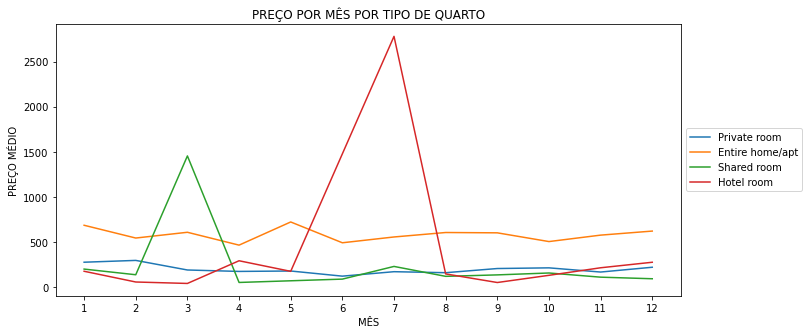

In [45]:
# Plot preço para cada neighborhood
fig = plt.figure(figsize=(14, 5))
ax = plt.subplot(111)
for neighbourhoo in  neighbourdhoods:
    ax.plot(price_by_month_neighborhood[price_by_month_neighborhood['room_type'] == neighbourhoo]['last_review_month'],
            price_by_month_neighborhood[price_by_month_neighborhood['room_type'] == neighbourhoo]['price'],
            label  = neighbourhoo
           )
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylabel('PREÇO MÉDIO')
plt.xlabel('MÊS')
plt.xticks(np.arange(1, 13, step=1))
plt.title('PREÇO POR MÊS POR TIPO DE QUARTO')
#plt.savefig('./preco_mes_neighbourhood.png')
plt.show()

>**ANALISE**<br>
>O tipo de Hotel room iniciou a valorização do preço médio no final da primavera, teve o pico no verão e durante grande parte do verão

##### Qual a Correlação entre as variáveis ?

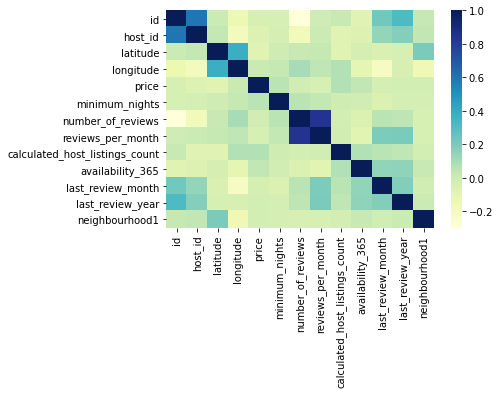

In [46]:
sns.heatmap(dflis0.corr(), cmap="YlGnBu", annot=False, fmt='g')

>**ANALISE**<br>
>Parece não haver uma correlação forte entre o preço e qualquer outra variável.

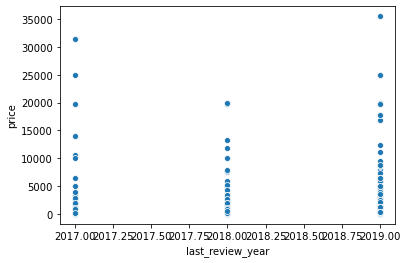

In [47]:
sns.scatterplot(data=dflis0, x='last_review_year', y='price')

Text(0.5, 0, 'PREÇO')

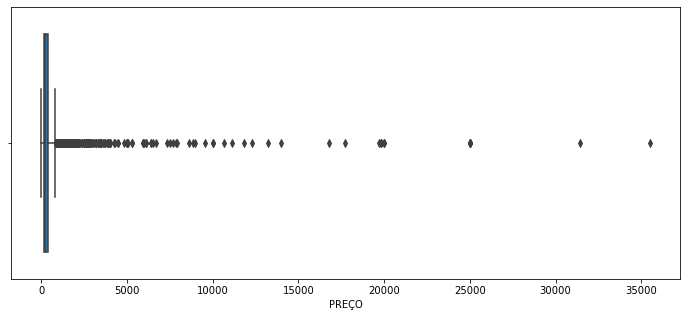

In [48]:
snsbox = sns.boxplot(x='price', data=dflis0, orient='h')
snsbox.figure.set_size_inches(12, 5)
snsbox.set_xlabel('PREÇO')

>**ANALISE**<br>
>Os preços outliers pode sem por conta do tipo de quarto (room_type) e localização do quarto (neighbourhood). São itens que fazem os preços serem diferenciados.